# Data wrangling or Pre-processing techniques

## Importing datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Importing dataset
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv'
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style","drive-wheels",
           "engine-location","wheel-base", "length","width","height","curb-weight","engine-type","num-of-cylinders", 
           "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg",
           "price"]
df = pd.read_csv(url, header=None)
df.columns = headers
pd.set_option("display.max_columns", None)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


## Handling Missing data

In [4]:
## Replace "?" with nan value
import numpy as np
df.replace("?",np.nan, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [5]:
#Finding nan values
for column in df:
    if df[column].isnull().any():
        print('"{0}" has {1} Null values'.format(column, df[column].isnull().sum()))

"normalized-losses" has 41 Null values
"num-of-doors" has 2 Null values
"bore" has 4 Null values
"stroke" has 4 Null values
"horsepower" has 2 Null values
"peak-rpm" has 2 Null values
"price" has 4 Null values


In [6]:
## Replacing nan values with mean
avg_norm_losses = df["normalized-losses"].astype("float").mean(axis=0)
df["normalized-losses"].replace(np.nan, avg_norm_losses, inplace=True)

avg_bore = df["bore"].astype("float").mean(axis=0)
df["bore"].replace(np.nan, avg_bore, inplace=True)

avg_stroke = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, avg_stroke, inplace=True)

avg_horsepower = df["horsepower"].astype("float").mean(axis=0)
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)

avg_peak_rpm = df["peak-rpm"].astype("float").mean(axis=0)
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

avg_price = df["price"].astype("float").mean(axis=0)
df["price"].replace(np.nan, avg_price, inplace=True)

## Replacing nan values with mode

df["num-of-doors"].replace(np.nan, df["num-of-doors"].value_counts().idxmax(), inplace=True)

In [7]:
#Changing the data types according to the data
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
df["horsepower"]=df["horsepower"].astype(int, copy=True)

## Data Standardization

In [8]:
## city-mpg and highway-mpg columns represent fuel consumption of vehicle in miles per gallon
# We will convert it to Liter per 100 km using below formula

## Formula
# L/100km = 235/mpg

df["city-L/100km"] = 235/df["city-mpg"]
df["highway-L/100km"] = 235/df["highway-mpg"]
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Normalization/Feature Scaling

In [10]:
# Let's scale length, width and height columns
df["length"]=df["length"]/df["length"].max()
df["width"]=df["width"]/df["width"].max()
df["height"]=df["height"]/df["height"].max()
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


## Data Binning

Text(0.5,1,'Horsepower bins')

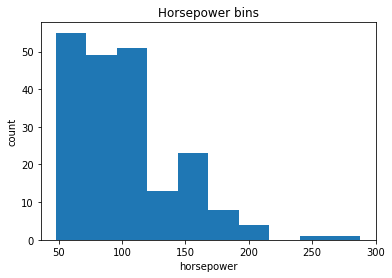

In [13]:
## Let's Visualize distribution of horsepower
import matplotlib.pyplot as plt

plt.hist(df["horsepower"])
plt.xlabel("horsepower")
plt.ylabel("count")
plt.title("Horsepower bins")

In [19]:
## Create 3 bins, low, medium and high for horsepower

bins=np.linspace(df["horsepower"].min(),df["horsepower"].max(),4)
group_names = ["low","medium","high"]
df["horsepower-binned"]=pd.cut(df["horsepower"], bins, labels=group_names, include_lowest=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,low


In [20]:
df["horsepower-binned"].value_counts()

low       163
medium     40
high        2
Name: horsepower-binned, dtype: int64

<BarContainer object of 3 artists>

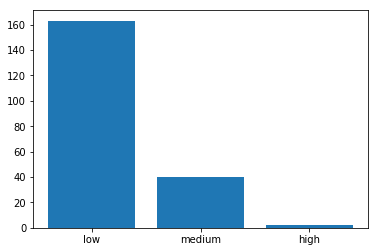

In [26]:
# Let's visualize the bins we created
plt.bar(group_names,df["horsepower-binned"].value_counts())

## Dummy variables

In [30]:
# Create dummy variables for column fuel type
fuel_types=pd.get_dummies(df["fuel-type"])
fuel_types.rename(columns={"diesel":"fuel-type-diesel","gas":"fuel-type-gas"},inplace=True)
fuel_types.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [34]:
# Merging the data
pd.concat([df,fuel_types],axis=1)
df.drop("fuel-type",axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,low
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,low
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,medium
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,low
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,low


In [35]:
# Create dummy variables for column aspiration
aspirations=pd.get_dummies(df["aspiration"])
aspirations.rename(columns={"std":"aspiration-std","turbo":"aspiration-turbo"},inplace=True)
# Merging the data
pd.concat([df,aspirations],axis=1)
df.drop("aspiration",axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704,low
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.886584,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704,low
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.905947,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462,medium
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.915629,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333,low
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.918396,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818,low


## Exporting dataset

In [37]:
df.to_csv("Automobiles.csv")